# $K$-Fold CV 
## CMSE 381 - Fall 2023
## Oct 4,  2023. Lecture 13



In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Let's bring back the data set from last time!

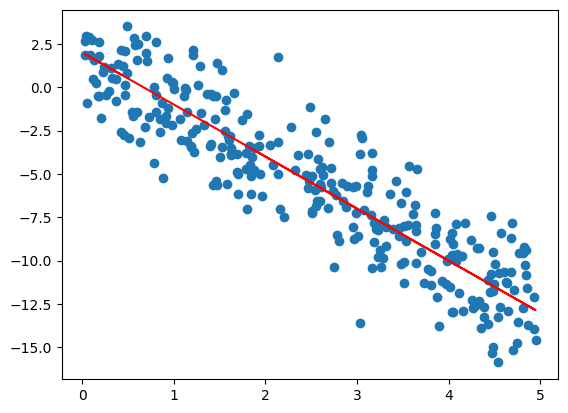

In [2]:
# Set the seed so everyone has the same numbers
np.random.seed(42)

def f(t, m = -3, b = 2):
    return m*t+b

n = 300
X_toy = np.random.uniform(0,5,n)
y_toy = f(X_toy) + np.random.normal(0,2,n)

X_toy = X_toy.reshape(-1,1)
y_toy = y_toy.reshape(-1,1)

plt.scatter(X_toy,y_toy)
plt.plot(X_toy,f(X_toy),c = 'red')

# 1. Roll your own $k$-fold

Ok, let's try to get a handle on what this $k$-fold CV is doing with our data. To do that, we're going to build our own $k$-fold splitter before we use the provided tools in `scikitlearn`. Of course, this is not going to be optimized at all, the goal is just to figure out how the innards are working. 

Before we get too far, let's remember some python commands that I always forget until I have to use them. 

In [ ]:
# This is the floor, which gives the whole part of the division, in this case 33/6.
print(33 // 5) 

# The leftover part is the remainder after the division
print(33 % 5) # Remainder

# The way I always think about this is if you are interested in n/k, then 
# k*floor + remainder = n

&#9989; **<font color=red>Do this:</font>** For our first example, let's say you have 12 data points and you want $k=4$ folds. How many data points will be in each fold?


*your answer here*

&#9989; **<font color=red>Do this:</font>** Below is the skeleton of code that will return the $k$-fold train/test splits. Update the code where noted to make it work. 

How do you check that your code is doing what you want? 
- Make sure you end up with $k$ splits 
- Make sure that each of the testing splits has $n/k$ data points
- Make sure that the rest of the data points end up in the training set. 
- A good check is to see that you have all $n$ data points between the training and testing set every time.

In [22]:
def mykfold(n,k):
    # Input: integers n and k.
    #        This version is only going to allow us to work with  
    #        a $k$ that is actually divisible by $n$ 
    # Output: a list of the train/test splits to be used.
    
    # This command is just going to make a warning so that if you pass in 
    # n and k not divisble, the code will kick you out.     
    assert (n % k == 0), "k doesn't divide n, this code can't handle it"
    
    # Make an array of the indices:
    all_my_indices = np.array(range(n))
    
    
    # First, shuffle your array to make sure we're working with randomized order.
    # ----your code here to shuffle----# 
    np.random.shuffle(all_my_indices)
    print(all_my_indices)
    
    # Write an equation that will figure out the length of each fold below
    length_of_fold = n // k
    
    
    # Now we're going to keep a list of all your splits. Modify the code below so that 
    # you can keep track of the training and testing splits.
    AllSplits = []
    for i in range(k):
        test_set = all_my_indices[i*length_of_fold:(i+1)*length_of_fold]
        
        training_set = np.concatenate([all_my_indices[0:i*length_of_fold],all_my_indices[(i+1)*length_of_fold:]])
        AllSplits.append({'train': training_set, 'test':test_set})
    
    return AllSplits
 
n = 12
k = 4
mykfold(n,k)
    

[10  6  5  7  2  0  1  4 11  3  9  8]
3
[] []
6
[7 2 0] []
9
[ 1  4 11] []
12
[3 9 8] []


[{'train': array([ 7,  2,  0,  1,  4, 11,  3,  9,  8]),
  'test': array([10,  6,  5])},
 {'train': array([10,  6,  5,  1,  4, 11,  3,  9,  8]),
  'test': array([7, 2, 0])},
 {'train': array([10,  6,  5,  7,  2,  0,  3,  9,  8]),
  'test': array([ 1,  4, 11])},
 {'train': array([10,  6,  5,  7,  2,  0,  1,  4, 11]),
  'test': array([3, 9, 8])}]

### Non-divisible version

Ok, so the code above divides your data points into $k$ fold so long as $k$ divides $n$ evenly, but this isn't a reasonable assumption to make in practice. 

&#9989; **<font color=red>Q:</font>** If you have $n=14$ data points and $k=4$ folds, how many data points are in each of the folds to have them be as close to even as possible? (Note the answer isn't the same for every fold).

*Your answer here*

Now we are going to fix the code above to allow for $n$ not divisible by $k$. We want to take all the leftover data points from dividing the folds evenly and just add them to the first folds. Below is one way to figure out how long each fold should be in this more general case. 

In [11]:
n = 14
k = 4

length_of_each_fold = np.array([n//k for i in range(k)])
length_of_each_fold[0:n%k]+=1


# print('Fold lengths before fixing:', length_of_each_fold)
# print('Total data points used:', sum(length_of_each_fold))
# print('Leftover data points:', n-sum(length_of_each_fold))
# print('Should be the same as the remainder:', n%k)
# print('\n')

# print('So we put all the leftovers in the piles one at a time:')
# for i in range(n % k):
#     length_of_each_fold[i]+=1
    
# print(length_of_each_fold)
# print('And now the total number of points should be the same as n:')
# print(np.sum(length_of_each_fold))

Fold lengths before fixing: [4 4 3 3]
Total data points used: 14
Leftover data points: 0
Should be the same as the remainder: 2


So we put all the leftovers in the piles one at a time:
[5 5 3 3]
And now the total number of points should be the same as n:
16


&#9989; **<font color=red>Do this:</font>** Copy your `mykfold` function down here.  Modify it so that it can accept $n$ and $k$ that aren't divisible. 

In [27]:
# Your code here #

def mykfold(n,k):
    # Input: integers n and k.
    #        This version is only going to allow us to work with  
    #        a $k$ that is actually divisible by $n$ 
    # Output: a list of the train/test splits to be used.
    
    # This command is just going to make a warning so that if you pass in 
    # n and k not divisble, the code will kick you out.     
    
    # Make an array of the indices:
    all_my_indices = np.array(range(n))
    
    
    # First, shuffle your array to make sure we're working with randomized order.
    # ----your code here to shuffle----# 
    np.random.shuffle(all_my_indices)
    
    # Write an equation that will figure out the length of each fold below
    length_of_fold_n = np.array([n//k for i in range(k)])
    length_of_fold_n[0:n%k]+=1
    
    print(length_of_fold_n)
    
    # Now we're going to keep a list of all your splits. Modify the code below so that 
    # you can keep track of the training and testing splits.
    AllSplits = []
    index = 0
    for i in range(k):
        test_set = all_my_indices[index : index+length_of_fold_n[i]]
        
        training_set = np.concatenate([
            all_my_indices[0:index],
            all_my_indices[index+length_of_fold_n[i]:]
        ])
        
        index += length_of_fold_n[i]
        
        AllSplits.append({'train': training_set, 'test':test_set})
    
    return AllSplits


n = 33
k = 5
mykfold(n,k)
    

[7 7 7 6 6]


[{'train': array([24,  2, 16, 25, 10, 27,  4, 14, 23,  1,  3, 21, 28, 18, 32, 29,  0,
         26,  9,  6, 17, 15, 22, 30, 13, 20]),
  'test': array([ 8, 11, 31, 19,  5, 12,  7])},
 {'train': array([ 8, 11, 31, 19,  5, 12,  7, 14, 23,  1,  3, 21, 28, 18, 32, 29,  0,
         26,  9,  6, 17, 15, 22, 30, 13, 20]),
  'test': array([24,  2, 16, 25, 10, 27,  4])},
 {'train': array([ 8, 11, 31, 19,  5, 12,  7, 24,  2, 16, 25, 10, 27,  4, 32, 29,  0,
         26,  9,  6, 17, 15, 22, 30, 13, 20]),
  'test': array([14, 23,  1,  3, 21, 28, 18])},
 {'train': array([ 8, 11, 31, 19,  5, 12,  7, 24,  2, 16, 25, 10, 27,  4, 14, 23,  1,
          3, 21, 28, 18, 17, 15, 22, 30, 13, 20]),
  'test': array([32, 29,  0, 26,  9,  6])},
 {'train': array([ 8, 11, 31, 19,  5, 12,  7, 24,  2, 16, 25, 10, 27,  4, 14, 23,  1,
          3, 21, 28, 18, 32, 29,  0, 26,  9,  6]),
  'test': array([17, 15, 22, 30, 13, 20])}]

Ok, so now your code returns indicies kind of like the LOOCV code from last time. 

&#9989; **<font color=red>Do this:</font>** Set up a linear regression model for the toy data above, and use your train test split code to figure out the MSE for each, then return the average for your $CV_{(4)}$ score, where this means we want $k=4$ folds.

In [72]:
n = X_toy.shape[0]
print(n)
k = 3

mySplits = mykfold(n,k)

MSE = []
for entry in mySplits:
    train_index = entry['train']
    test_index = entry['test']
    print("TRAIN:", train_index, "\nTEST:", test_index, '\n')

    #Your code here!
    
print(np.average(MSE))

300
[100 100 100]
TRAIN: [ 97 262 101 207  15 169  86 291 299  47  41 225   9  63  94 114  93  36
 156 287 297  17 249 160 273 113 185  32 188  48  71 237 112  78  88 256
 129 295  90 124 147 138 257 176 180  19 174 250 189 289  74  30 181 115
 271 229 116  70 255  10   4 243 212 206 127  79 117 286 173  96 232 208
  11  56  40 233  38 102  83 223 272 239 182 106 110  21 170  91 226 231
 179  76   1  80  98 163 227   5 154 140 261  45 211  39 265  55 292  53
 236 167 248 280 244 186 151 230  23  20 224 204 218 136 201  68 210 133
  51 263 277 137 288  65 119  12   6 144 175  92  75  66  50 266  85 213
   2 194 159 241 100 268  69  77  14  43 259 125 293  44 197 298 118 251
 195  16 121 269  73 145 177 107 132 105 139 184 134   0 216  87  67 165
 278 158 149 205 234 193 203 166   3 157 219  81  34 178 254 199 200  37
 161 253] 
TEST: [  7 126  13  72  49 294 285  82 130 191 198 209  22 290 202 104 228 150
 196 148  95  54  31 258 247  33 282 123 270  62 172  29  89 221  64 274
  24 108 

# 2. Letting scikitlearn do the work for us. 

Ok, now that we understand the innards, we can let `scikitlearn` do this for us.

In [59]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=len(X_toy))

# Notice that like the leave one out version, trying to print kf still doesn't 
# give us much that's useful
print(kf)

KFold(n_splits=300, random_state=None, shuffle=False)


We can see the splits by putting this generator into a for loop as follows.

In [60]:
for train_index, test_index in kf.split(X_toy):
    print("TRAIN:", train_index, "\nTEST:", test_index, '\n')
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]

TRAIN: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

There is a BIG PROBLEM with this code.  We haven't done something!!! Something important!!!

&#9989; **<font color=red>Q:</font>** What didn't we do? This is an easy fix, checkout the [documentation for `KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), then modify the code below to fix the problem. 



In [61]:
# Fix this code! 
kf = KFold(n_splits=3, shuffle=True)

for train_index, test_index in kf.split(X_toy):
    print("TRAIN:", train_index, "\nTEST:", test_index, '\n')
    X_train, X_test = X_toy[train_index], X_toy[test_index]
    y_train, y_test = y_toy[train_index], y_toy[test_index]

TRAIN: [  0   1   2   5   8   9  12  13  14  15  16  17  19  20  21  22  23  24
  25  26  27  28  30  31  33  34  35  37  39  40  41  42  43  44  45  49
  50  53  54  55  56  57  60  61  63  64  66  67  68  69  70  73  74  77
  78  79  80  81  82  83  84  86  87  88  89  93  95  96  97  98  99 100
 102 104 106 107 108 109 111 113 114 115 116 118 119 120 121 124 125 126
 127 128 129 131 133 134 136 139 143 145 146 147 148 149 150 153 154 155
 156 157 158 161 167 168 170 171 172 173 175 176 177 178 179 180 181 183
 184 186 187 191 193 195 196 197 200 201 203 204 205 206 208 209 210 211
 213 214 218 219 220 224 225 228 230 232 233 234 236 237 239 240 241 242
 245 246 247 250 251 253 254 256 257 260 263 264 265 266 267 268 269 270
 271 272 274 276 277 278 281 282 283 284 286 288 290 291 293 294 295 297
 298 299] 
TEST: [  3   4   6   7  10  11  18  29  32  36  38  46  47  48  51  52  58  59
  62  65  71  72  75  76  85  90  91  92  94 101 103 105 110 112 117 122
 123 130 132 135 137 138 14

Now that we have our train/test split generator set up, let's take a look at the result. Note that this is just going to color by the last split generated in that for loop up above. 

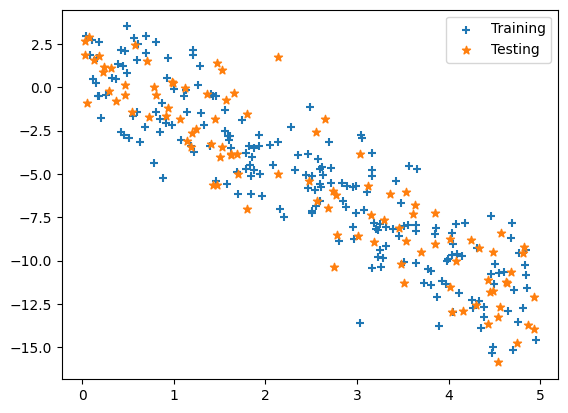

In [57]:
plt.scatter(X_train,y_train, marker = '+', label = "Training")
plt.scatter(X_test,y_test, marker = '*', label = "Testing")
plt.legend()

&#9989; **<font color=red>Q:</font>** Below is my code from last class to train our linear regression model, again just using that last train/test split. Fix this so that it uses every k-fold train/test split ($k=5$) and returns the average of the MSEs. 


In [70]:
# Your code goes here

model = LinearRegression()
model.fit(X_train,y_train)
y_hat = model.predict(X_test.reshape(-1,1))

mean_squared_error(y_hat,y_test)

4.336700670206742

&#9989; **<font color=red>Q:</font>** What happens if you set `n_splits = n`? 

*Your answer here*

### Easy mode

As before, we can build all this work into a very compact code, which really is doing the same thing, just in a few lines. 

In [63]:
# This command does all your work for you
# Note this is the same command you used Monday for LOOCV
from sklearn.model_selection import cross_val_score

#build linear regression model
model = LinearRegression()

# Pick your CV method
kf = KFold(n_splits=5, shuffle = True)

#use 5-fold CV to evaluate model
scores = cross_val_score(model, X_toy, y_toy, 
                         scoring='neg_mean_squared_error',
                         cv=kf)

#view mean absolute error
np.average(np.absolute(scores))



3.9730370922336204

&#9989; **<font color=red>Q:</font>**
- How do you change the above code to do $k$-fold CV for a different $k$?
- You didn't get exactly the same value as you computed a few cells up. Why?



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.